# Pre-owned Car Selling Price Prediction ML Project

Perform EDA and derive Insights from the CAR DETAILS dataset using Various Data Analysis and Data Visualization libraries of Python such as Pandas, Matplotlib & Seaborn. Create and Deploy a ML Model Which can be accessed by all,using Streamlit and GitHub.

<i>About Dataset</i> :<br>
This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- owner

### Context
-Importing Libraries

-Exploratory Data Analysis
  - Importing Dataset
  - [Checking Dataset Information](#shape)
  - Checking Null Values
  - [Calculating and removing duplicate values](#dup)
  - [Statistical Report](#stat)
  - [Feature Engineering](#feature)
  - Data Visualization
      1. [Categorical Column](#cat)
      2. [Numerical Column](#num)
      3. [Some Important Bivalent Plot](#bi)
      4. [Checking Correlation](#corr)
      5. [Outlier Detection through Box plot](#box)
  - [Performing and Removing Outlier](#out)
  - [Saving the Processed Dataset](#data)
  

## Importing The Dependencies

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [2]:
# Importing Dataset
df = pd.read_csv('CAR DETAILS.csv')

In [3]:
# Inspect Content of the Dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Capitalize Column Header
df.columns = df.columns.str.title()

<a id='shape'></a>

In [5]:
# Analysing Basic Structure of Dataset
print('Shape of the DataFrame:',df.shape)
print('\nTotal Entry in Dataframe:',df.size)
num_rows, num_columns = df.shape
print(f'\nRows: {num_rows}, Columns: {num_columns}')
print('\nDataset information:')
print(df.info())

Shape of the DataFrame: (4340, 8)

Total Entry in Dataframe: 34720

Rows: 4340, Columns: 8

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   Km_Driven      4340 non-null   int64 
 4   Fuel           4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [6]:
# Checking Missing Valuse
print('Missing values in the dataset:')
print(df.isnull().sum())

Missing values in the dataset:
Name             0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


<a id='dup'></a>

In [7]:
# Calculating Duplicates
print('\nTotal Duplicated Values in Dataframe :', df.duplicated().sum())


Total Duplicated Values in Dataframe : 763


> Summary
- The Dataset consists of 4340 entries and 8 features(columns).
- The Features include a mix of categorical(i.e., Fuel, Seller_Type etc) and numerical variables(i.e., Year, Selling_Price etc). 
- The dataset does not have any missing values, but there are 763 duplicate values.

In [8]:
# Removing Duplicate Values
df = df.drop_duplicates().reset_index(drop=True)

#### Statistical Report
<a id='stat'></a>

In [9]:
df.describe()

,Year,Selling_Price,Km_Driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### Checking Outlier Data Points By Analyzing The Statistical Report

In [10]:
df[df["Year"]>2019]

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
145,Maruti Wagon R LXI,2020,240000,120000,Petrol,Individual,Manual,First Owner
163,Maruti Alto K10 LXI CNG,2020,282000,40000,CNG,Individual,Manual,First Owner
275,Mahindra XUV500 W11 Option AWD,2020,1400000,25000,Diesel,Dealer,Manual,First Owner
618,Hyundai Grand i10 Nios Magna CRDi,2020,700000,1400,Diesel,Individual,Manual,First Owner
846,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
883,Hyundai Creta 1.4 EX Diesel,2020,1050000,10000,Diesel,Individual,Manual,First Owner
1053,Maruti Baleno Zeta,2020,700000,1100,Petrol,Individual,Manual,First Owner
1148,Maruti Alto 800 VXI,2020,350000,1000,Petrol,Individual,Manual,First Owner
1181,Maruti Swift VXI,2020,619000,1500,Petrol,Individual,Manual,First Owner
1266,Volkswagen Polo 1.0 TSI Highline Plus,2020,802000,5000,Petrol,Individual,Manual,First Owner


In [11]:
df[df["Selling_Price"]>4e6]

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
76,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
88,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner
524,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner
540,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
846,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
2881,BMW 5 Series 520d Luxury Line,2018,4800000,9422,Diesel,Individual,Automatic,First Owner
3257,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
3260,Land Rover Range Rover 4.4 Diesel LWB Vogue SE,2010,4200000,100000,Diesel,Dealer,Automatic,First Owner
3267,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner
3341,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner


In [12]:
df[df["Km_Driven"]>350000]

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
510,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1101,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
3091,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner


Through the statistical report, I had identified that the numerical columns definitely contain outliers. However, I can't take action by encapping or deleting them because I'm following the rough pattern indicated by the interquartile range (IQR) in the report. I'm not sure if excluding these points is a good idea. Let's continue with our analysis for now, and later, we can explore other methods to handle potential outliers, such as using a box plot or conducting statistical tests. Afterward, we can apply the IQR method to address them.

In [13]:
# Checking Unique value
print('Unique value in each column:\n')
print(df.nunique())

Unique value in each column:

Name             1491
Year               27
Selling_Price     445
Km_Driven         770
Fuel                5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64


#### Feature Engineering
<a id='feature'></a>

In [14]:
# Extracting Manufacturer from Name Feature 
df['Car_Brand'] = df['Name'].str.split().str[0]

# Modifying The Name Feature
df['Name'] = df['Name'].str.split(' ').str.slice(1,2).str.join(' ')
df = df.rename(columns={'Name': 'Car_Name'}) 

In [15]:
# Reviewing The Dataset After Performing Actions
df.head()

,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Car_Brand
0,800,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [16]:
# Changing the position of Company Feature
company_column = df.pop('Car_Brand')
# Adjusting Car_Brand feature
df.insert(0, 'Car_Brand', company_column)

In [17]:
# Displaying Dataset After Feature Engineering
df.head()

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner


`Observation`:
* There are <b>1,491</b> unique values in the <b>name</b> column, which include <i>car brand, car model & other specifications</i>, making model training challenging.
* To handle this issue, take out the brand name and modify the <b>name</b> column by removing the extra specification to make it less complex and to predict the selling price of car more accurately.


#### Performing graphical analysis on dataset and drawing conclusions from them.

In [18]:
# Seperating Categorical and Numerical Column
numerical_col = []
categorical_col = []

for i in df.columns:
    if df[i].dtype == 'object':
       categorical_col.append(i)
    else:
       numerical_col.append(i)    

print('Categorical Columns:',categorical_col)
print('Numerical Columns',numerical_col)

Categorical Columns: ['Car_Brand', 'Car_Name', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']
Numerical Columns ['Year', 'Selling_Price', 'Km_Driven']


In [19]:
# Display Value Counts For Selected Categorical Columns 
for i in categorical_col[2:]:
    print(f'Value counts for {i} column:\n')
    print(df[i].value_counts())
    print('')
    print('='*30,'\n') 

Value counts for Fuel column:

Fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64


Value counts for Seller_Type column:

Seller_Type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64


Value counts for Transmission column:

Transmission
Manual       3265
Automatic     312
Name: count, dtype: int64


Value counts for Owner column:

Owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64




#### Data Vizulization
<a id='cat'></a>

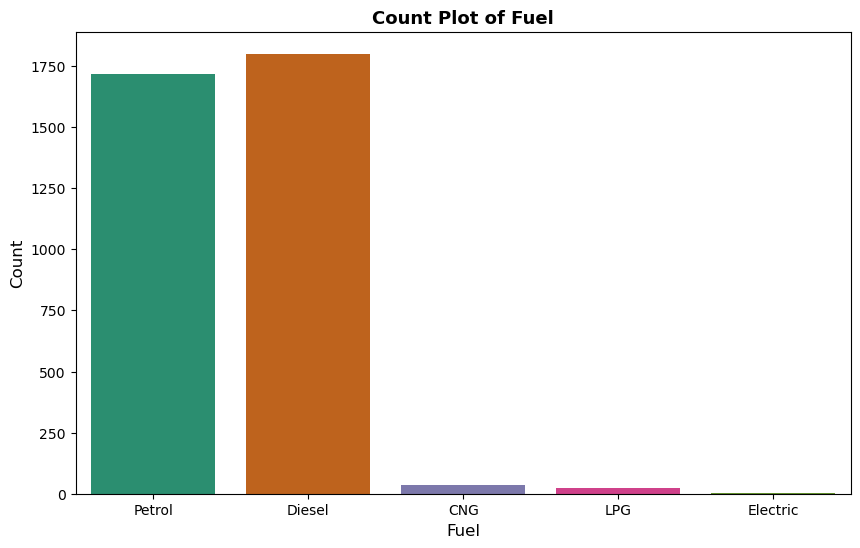

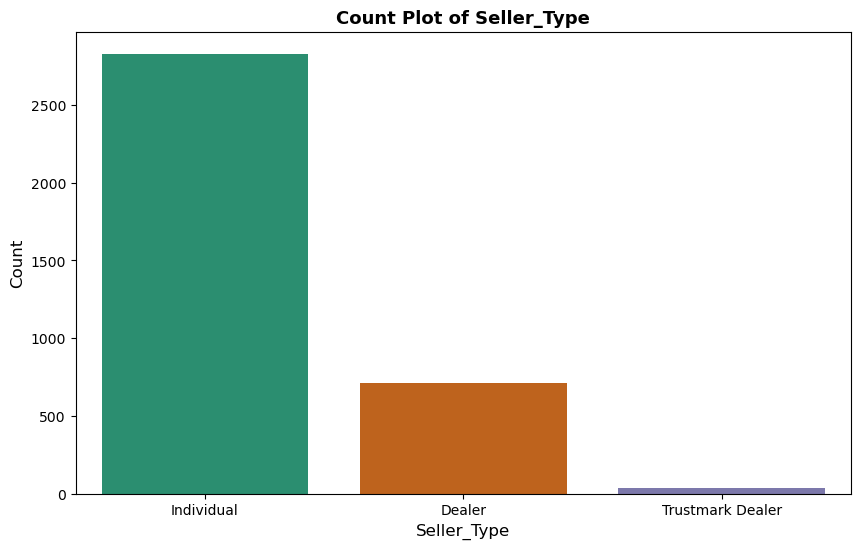

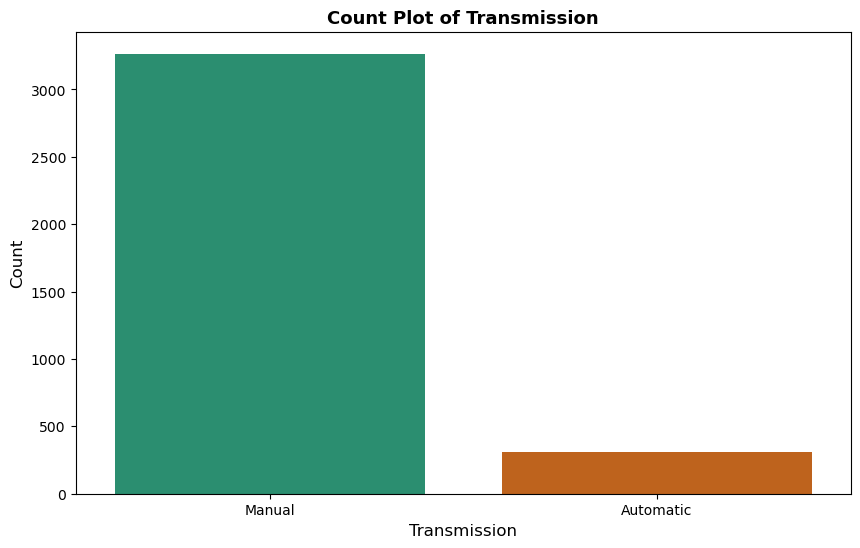

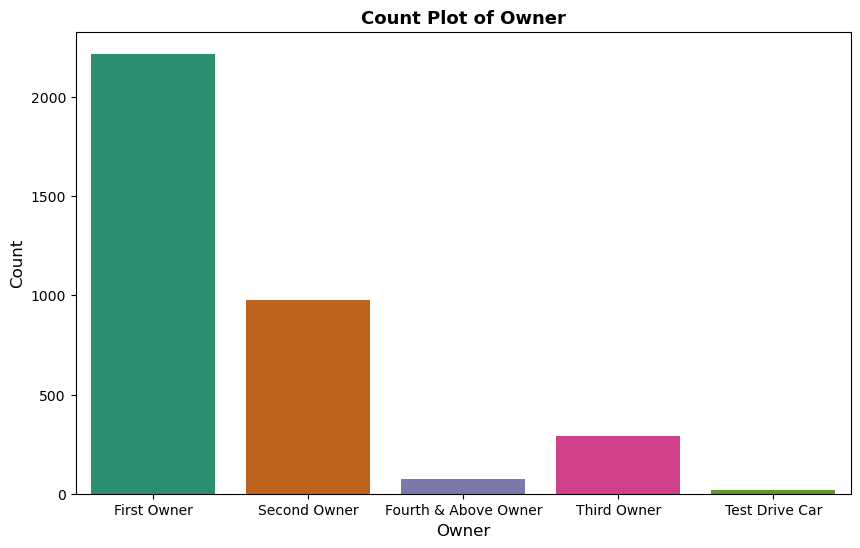

In [20]:
# Plotting Count Plot for Choosen Categorical Features
for i in categorical_col[2:]:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=i, palette='Dark2')  
    plt.title(f'Count Plot of {i}',weight='bold',fontsize=13)  
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Count',fontsize=12)  
    plt.show()

> Insight:
1. `Fuel` - Most cars are either belongs to diesel (1800) or petrol (1717) fuel type. Electric vehicle appear to be the least common, with an almost negligible count compared to the other fuel types may be due to poor infrastructure and high pricing.
2. `Seller` - The car seller Individaual seems to be first owners (2218) as majority sellers. Whereas, Trustmark Dealers are least common (33) perhaps, due to its high selling price of the car.
3. `Transmission` - Most of the car belongs to Manual transmission type (3265) than Automatic transmission may be due to sophisticated mechanism, high maintenance and high selling price.
4. `Owner` - Most of the owner are First owner (2832) also suggests that the majority of the cars in the dataset are relatively new, as most of them are first or second owners.And Test Drive Cars are the least common type of owner, with a count of 17 may be due to its rough handling and wear and tear of car.

Text(0, 0.5, 'Car Brand')

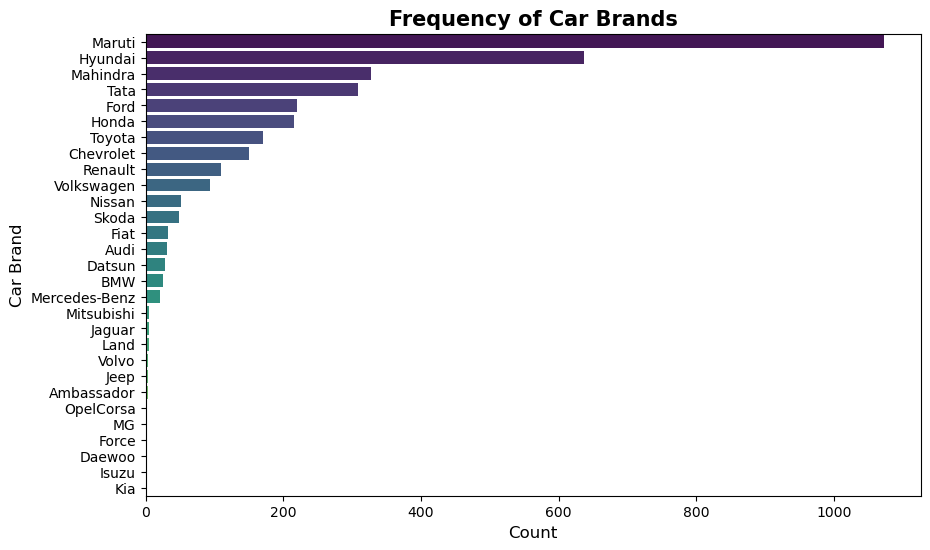

In [21]:
company = df['Car_Brand'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=company.values, y=company.index, palette="viridis")
plt.title('Frequency of Car Brands', weight='bold', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Car Brand', fontsize=12)

> Insight:

Maruti (1072) is the most popular car brand, with almost twice the number of sales compared to the second-place brand, Hyundai (637), which  indicating a strong demand for Maruti vehicles in the pre-owned automobile market.

There is a significant drop in sales between Maruti Suzuki and Hyundai, with the following brands having considerably fewer sales.

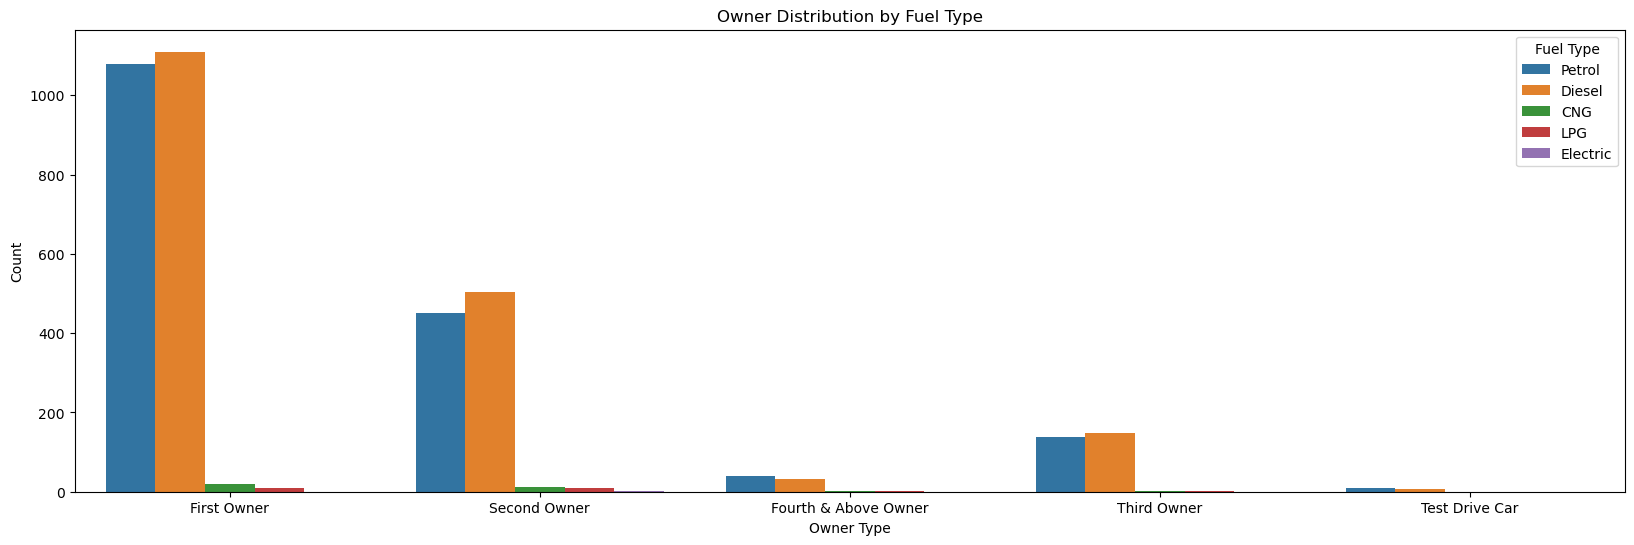

In [22]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Owner', hue='Fuel')
plt.title('Owner Distribution by Fuel Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.legend(title='Fuel Type') 
plt.show()

> Insight:

Among first-owner vehicles:
- 1079 have petrol fuel car
- 1110 have diesel fuel car
- 19 have CNG fuel car
- 11 have LPG fuel car

Among second-owner vehicles:
- 452 have petrol fuel car
- 503 have diesel fuel car
- 13 have CNG fuel car
- 9 have LPG fuel car
- 1 has electric powered car, almost zero.

Among third-owner vehicles:
- 137 have petrol fuel car
- 148 have diesel fuel car
- 2 have CNG fuel car
- 2 have LPG fuel car

Among fourth and above owner vehicles:
- 39 have petrol fuel car
- 32 have diesel fuel car
- 3 have CNG fuel car
- 1 have LPG fuel car

Among test drive car owner:
- 10 have petrol fuel car
- 7 have diesel fuel car

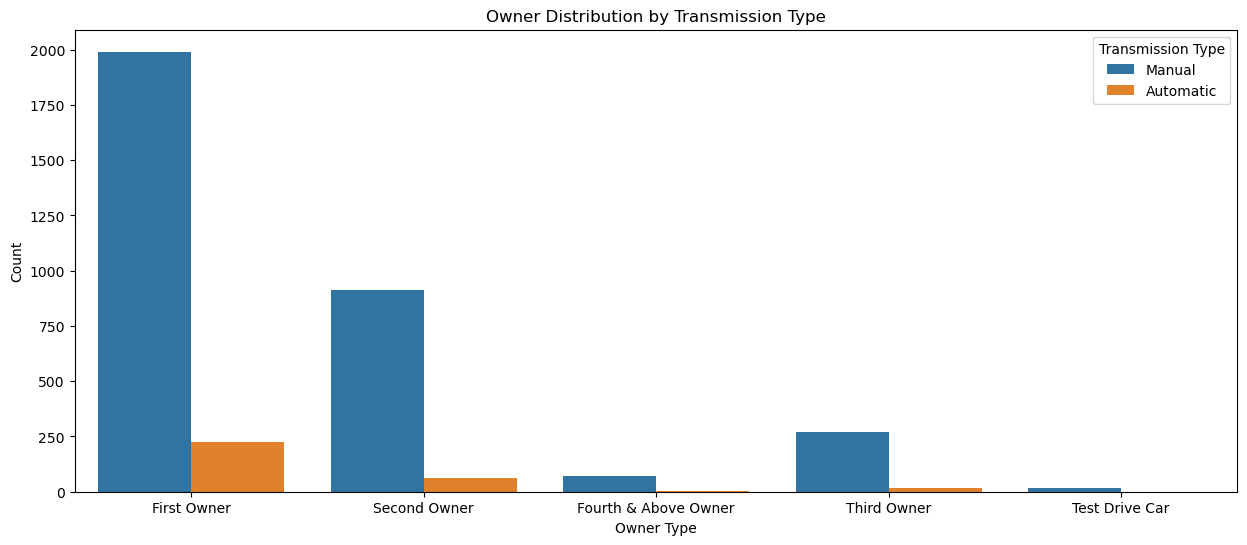

In [23]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Owner', hue='Transmission')  
plt.title('Owner Distribution by Transmission Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.legend(title='Transmission Type')
plt.show()

> Insight:

Among first-owner vehicles:
- 227 have automatic transmission
- 1991 have manual transmission

Among second-owner vehicles:
- 64 have automatic transmissions
- 914 have manual transmissions

Among third-owner vehicles:
- 2 have automatic transmissions.
- 271 have manual transmissions.

Test drive car has only one autmatic transmission which is negligible in number

#### Analysis of Numerical Features
<a id='num'></a>

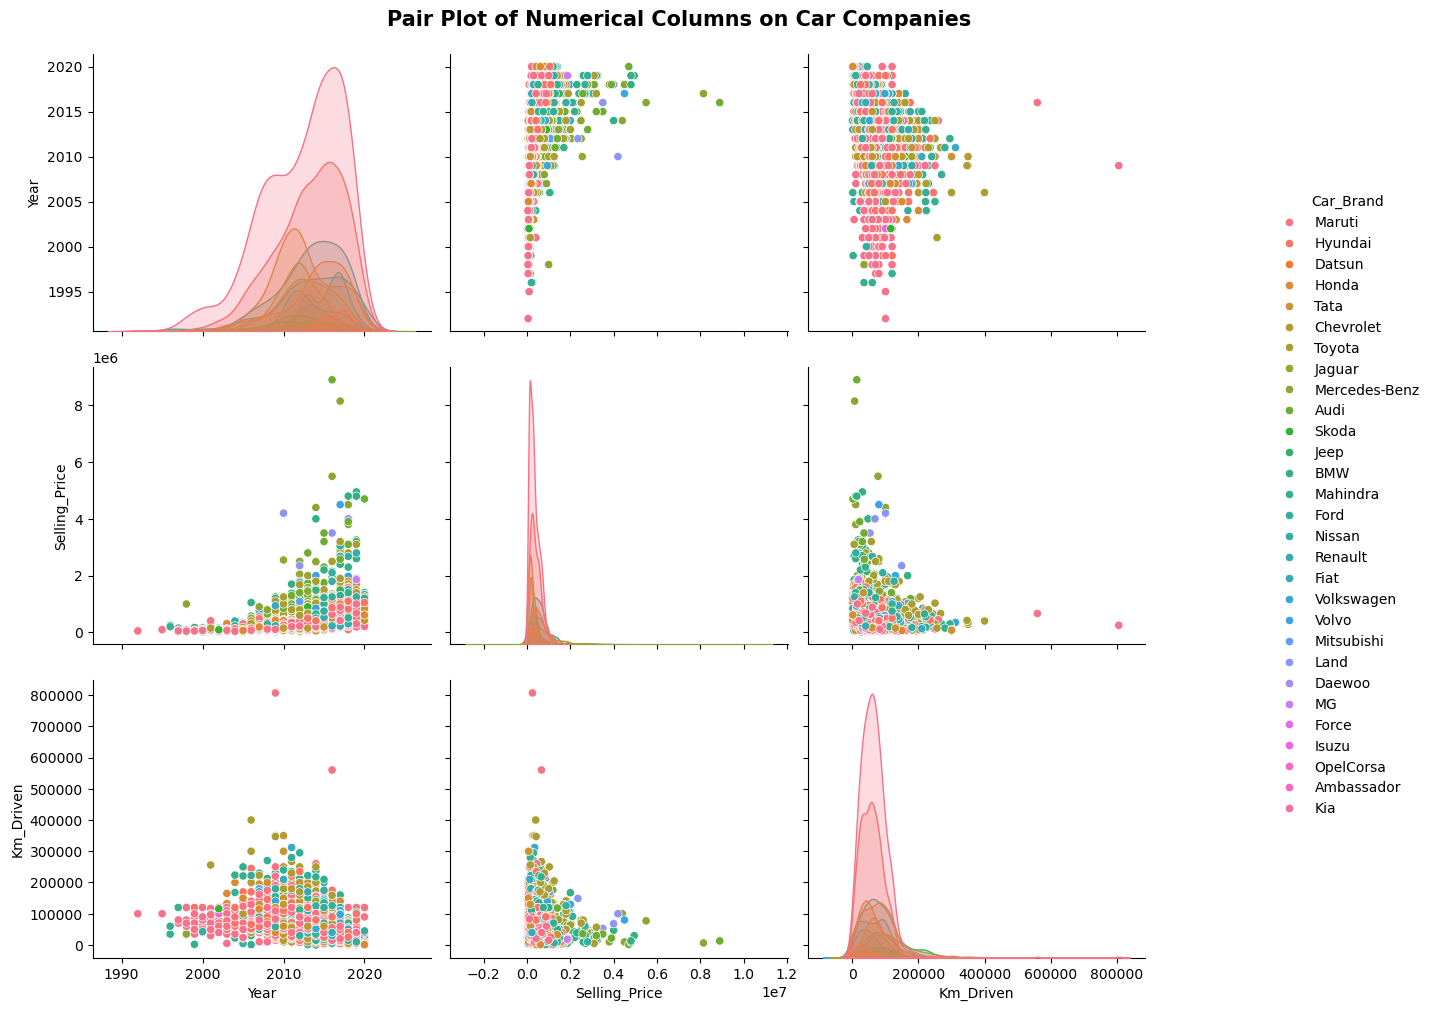

In [24]:
# Plotting Pair Plot for Numerical Columns
plot = sns.pairplot(df, hue='Car_Brand')
plot.fig.set_size_inches(15, 10)
plt.gcf().suptitle('Pair Plot of Numerical Columns on Car Companies', y=1.025, weight='bold', fontsize=15)
plt.show()

> Analysis from the plot:
- `Selling_Price vs Year` - There is positive correlation between Year and Selling Price as newer cars tend to have higher selling prices as moving toward to 2020 which reflects that newer cars tend to have higher resale values. However, there are some outliers with very high selling prices, which represent luxury brand.
- `Km_Driven vs Year` - Show no strong correlation as whole between year and mileage but after 2009, it shows a negative correlation as older cars might have higher km driven. This is expected as cars accumulate mileage over time.
- `Km_Driven vs Selling_Price` - Negative correlation, indicating that as the kilometers driven increase, the selling price tends to decrease. Indicating that cars with higher mileage tend to have lower selling prices. 
- `Km_Driven vs Km_Driven` - The dataset shows highly left skewed indicating that the majority of cars have used less.
- `Selling_Price vs Selling_Price` -Highly Left skewed suggesting most cars have lower selling prices, there are a few high-value outliers significantly affecting the average.
- `Year vs Year` - The shape of the histogram reveals a right-skewed distribution indicates that there are most of the cars are new rather old .

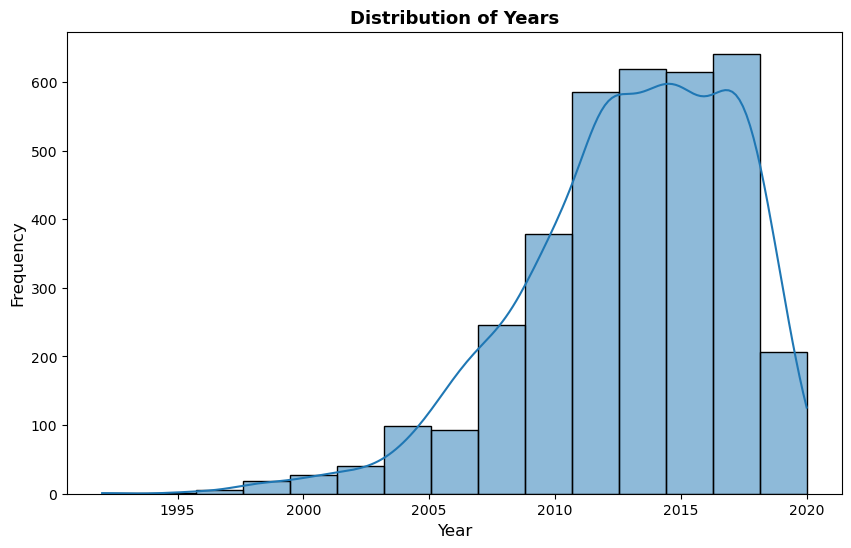

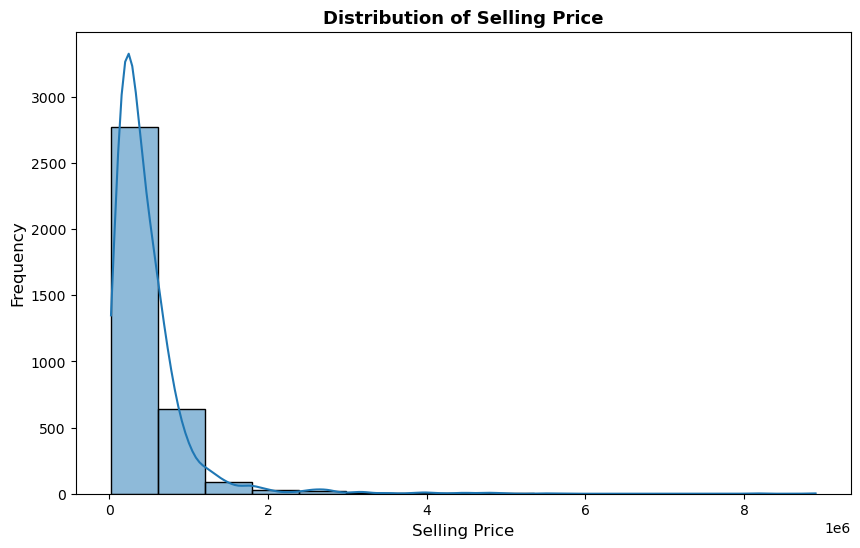

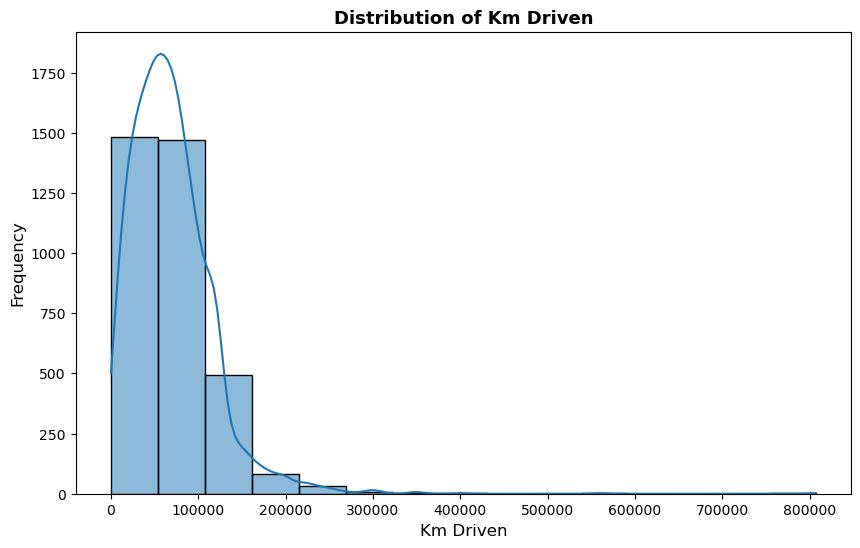

In [25]:
# Analyse the distribution of Numerical columns
titles = ['Distribution of Years','Distribution of Selling Price','Distribution of Km Driven'] 
for i, col in enumerate(numerical_col):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(titles[i], weight='bold', fontsize=13)
    plt.xlabel(col.replace('_', ' '), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

> Insight from the plot: 

Distribution of year:
- The distribution is right skewed suggesting that there are more recent year car in the dataset.
- The analysis highlights a significant peak in car production between 2012 to 2017, indicating that most of the vechicles (1234) are from these years. 
- There are a few (25) cars from before 2000. However, the number of cars steadily increases from 2000 to 2015.

Distribution of Selling price:
- The distribution is left-skewed, indicating that most cars are sold at lower prices and the peak of the distribution is around 0, suggesting that the majority of cars (3542) in the dataset are priced relatively low (approx or below the 50000/-).
- The range 0 to approx. 9 million showing that there is a wide variation in the pricing of second-hand cars in the market.

Distribution of Km Driven:
- The distribution is skewed to the left, indicating that most cars have relatively driven less (means in good condition). 
- The highest frequency of cars (3399) falls within the 0 to 150,000 km range which shows that majority of car in second-hand car market consists of car that have been used less than 150,000 km. And After 150,000 km, the frequency of cars decreases sharply.This suggests that cars with higher usage are less common.

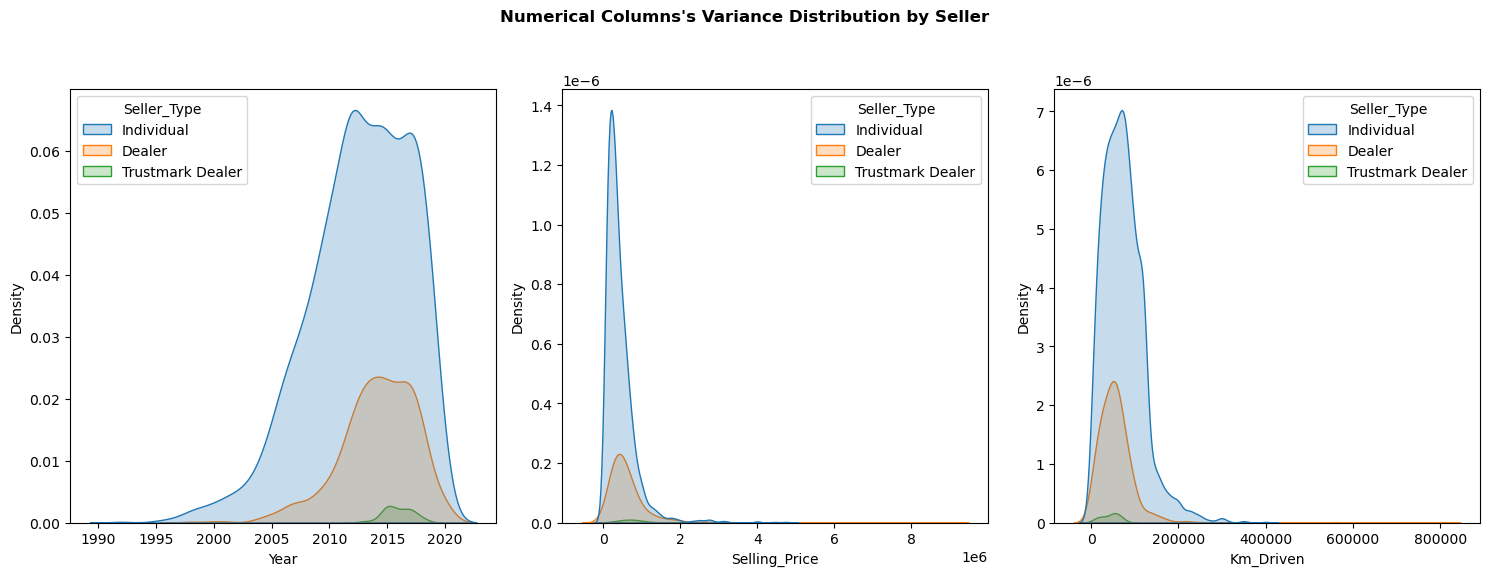

In [26]:
plt.figure(figsize=(15,10))
for i in range(len(numerical_col)): 
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df, x=numerical_col[i], hue='Seller_Type', fill=True)
plt.suptitle("Numerical Columns's Variance Distribution by Seller", y=1.02,weight='bold',fontsize=12)
plt.tight_layout() 
plt.show()


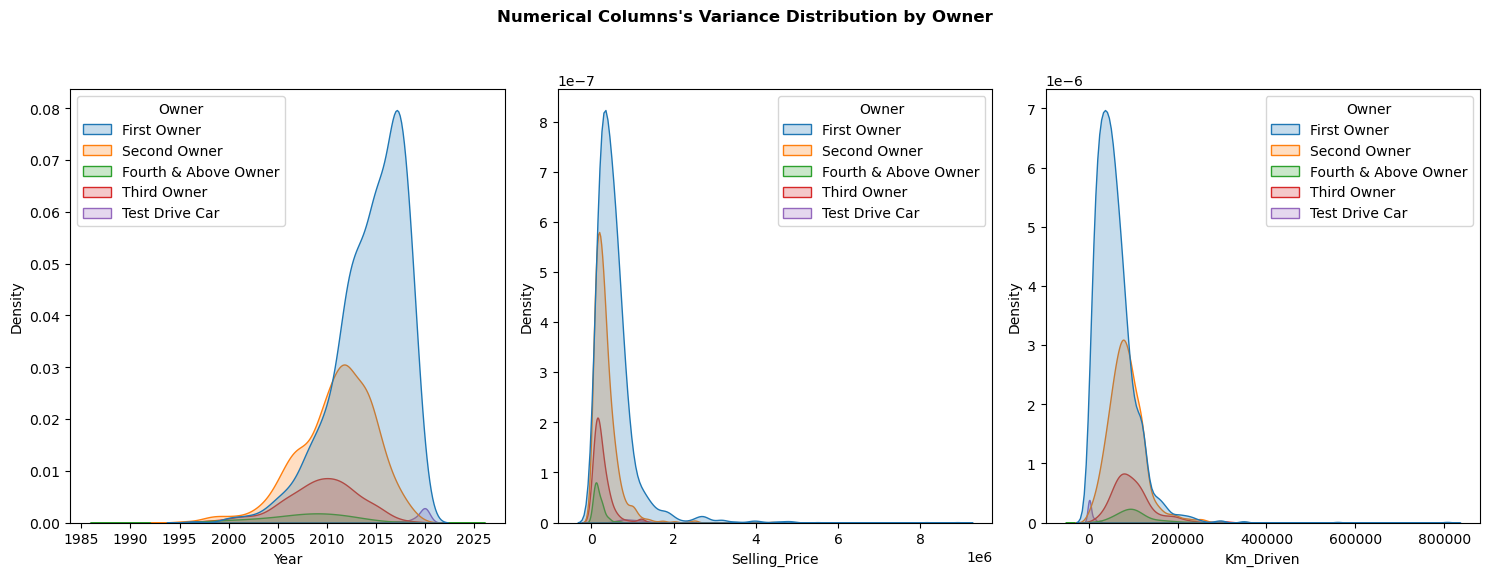

In [27]:
plt.figure(figsize=(15,10))
for i in range(len(numerical_col)): 
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df, x=numerical_col[i], hue='Owner', fill=True)
plt.suptitle("Numerical Columns's Variance Distribution by Owner", y=1.02,weight='bold',fontsize=12)
plt.tight_layout() 
plt.show()

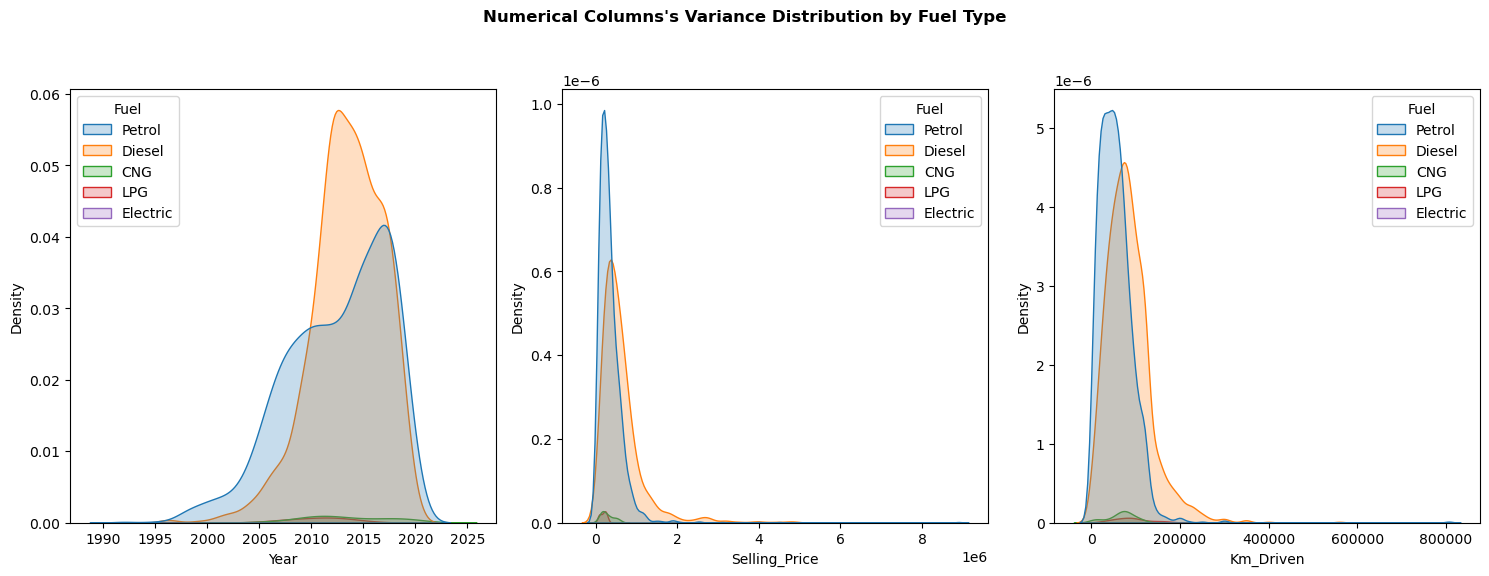

In [28]:
plt.figure(figsize=(15,10))
for i in range(len(numerical_col)): 
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df, x=numerical_col[i], hue='Fuel', fill=True)
plt.suptitle("Numerical Columns's Variance Distribution by Fuel Type", y=1.02,weight='bold',fontsize=12)
plt.tight_layout() 
plt.show()

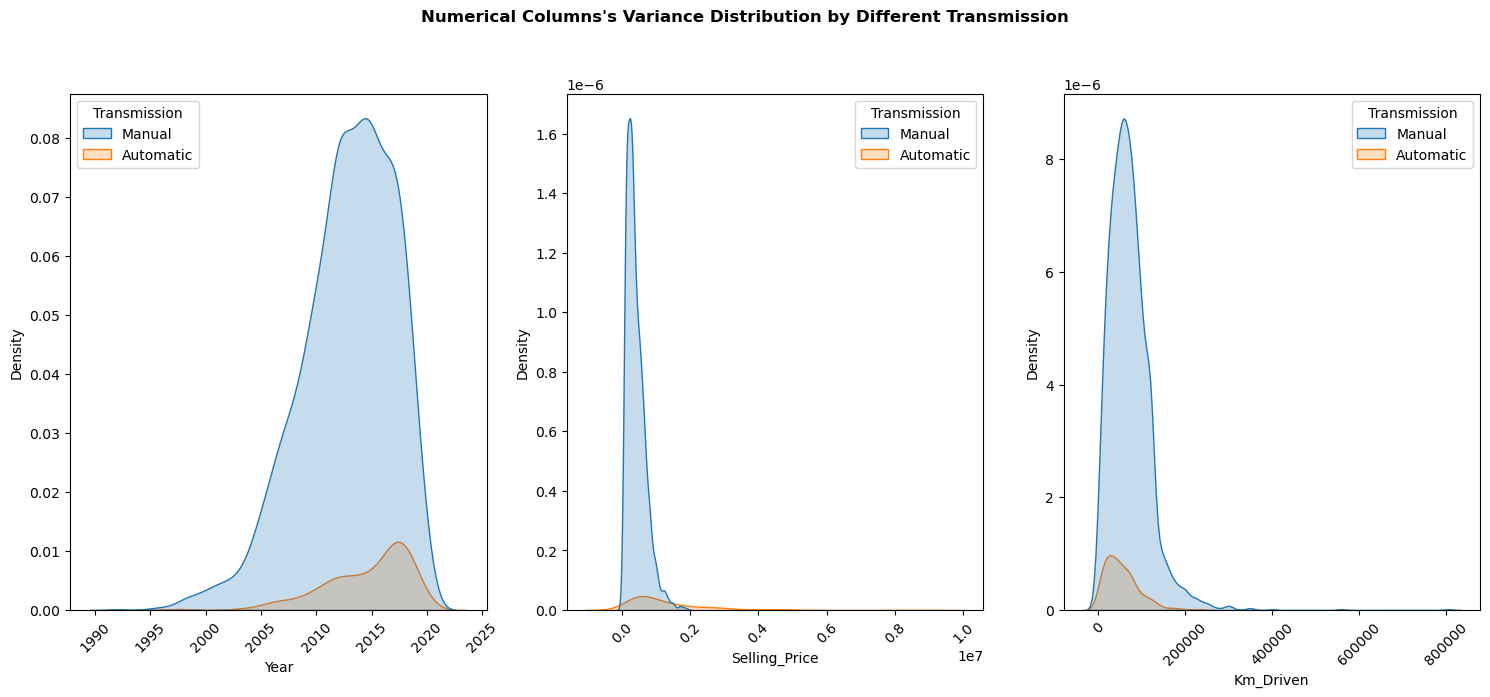

In [29]:
plt.figure(figsize=(15,12))
for i in range(len(numerical_col)): 
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df, x=numerical_col[i], hue='Transmission', fill=True)
    plt.xticks(rotation=45)
plt.suptitle("Numerical Columns's Variance Distribution by Different Transmission", y=1.02,weight='bold',fontsize=12)
plt.tight_layout() 
plt.show()

> Insight

The plots show a right skewed in the 'Year' column and  extreme left skewed in both 'Selling Price' and 'Km Driven'. This indicates that most of the cars sold by the sellers belong to recent years, are sold at lower prices, and have lower mileage, according to the dataset.

- KDE Plot on Numerical Column by seller type:<br>
The analysis showed that most cars sold were from 2012 to 2018, with individual sellers leading this segment, showing a preference for newer cars. Most cars were priced lower, especially those from individual sellers, making them more affordable than those from dealers and Trustmark dealers. Cars from Trustmark dealers also had less driven, meaning they were less used.

- KDE Plot on Numerical Column by Owner:<br>
The majority of cars sold were relatively new, with a density peak around 2017, particularly for first-owner vehicles. In terms of selling price, there was a concentration of lower-priced cars, indicating that first-owner cars were frequently sold at lower prices. Additionally, most cars showed less usage, with first-owner vehicles again having the highest density, suggesting they tended to experience less wear and tear compared to others.

- KDE Plot on Numerical Column by Fuel type:<br>
The plot showed that petrol and diesel cars were the most common, with diesel cars experiencing a sharp rise between 2008 and 2011, indicating the popularity of deisel fuel car in those years. In terms of selling price, most cars were priced lower, with petrol cars offering a more affordable range than diesel, while diesel cars had a wider price range compared to others. Additionally, petrol and diesel models covered more distance than any other fuel type, indicating they were used more than other vehicles. There was also only one electric vehicle in the market, which was almost zero compared to other fuel cars.

- KDE Plot on Numerical Column by Transmission:<br>
The data showed that most cars sold were manual, with a peak around 2015, indicating a preference for manual transmission cars, while automatics became popular around 2003 and reached their peak around 2017. Manual cars dominated the lower price range, suggesting they were more affordable than automatics. Additionally, most cars had covered short distance, particularly automatic vehicles, indicating they were used less compared to manual cars.


#### Plotting some important Bivariate plot on Fuel Type
<a id='bi'></a>

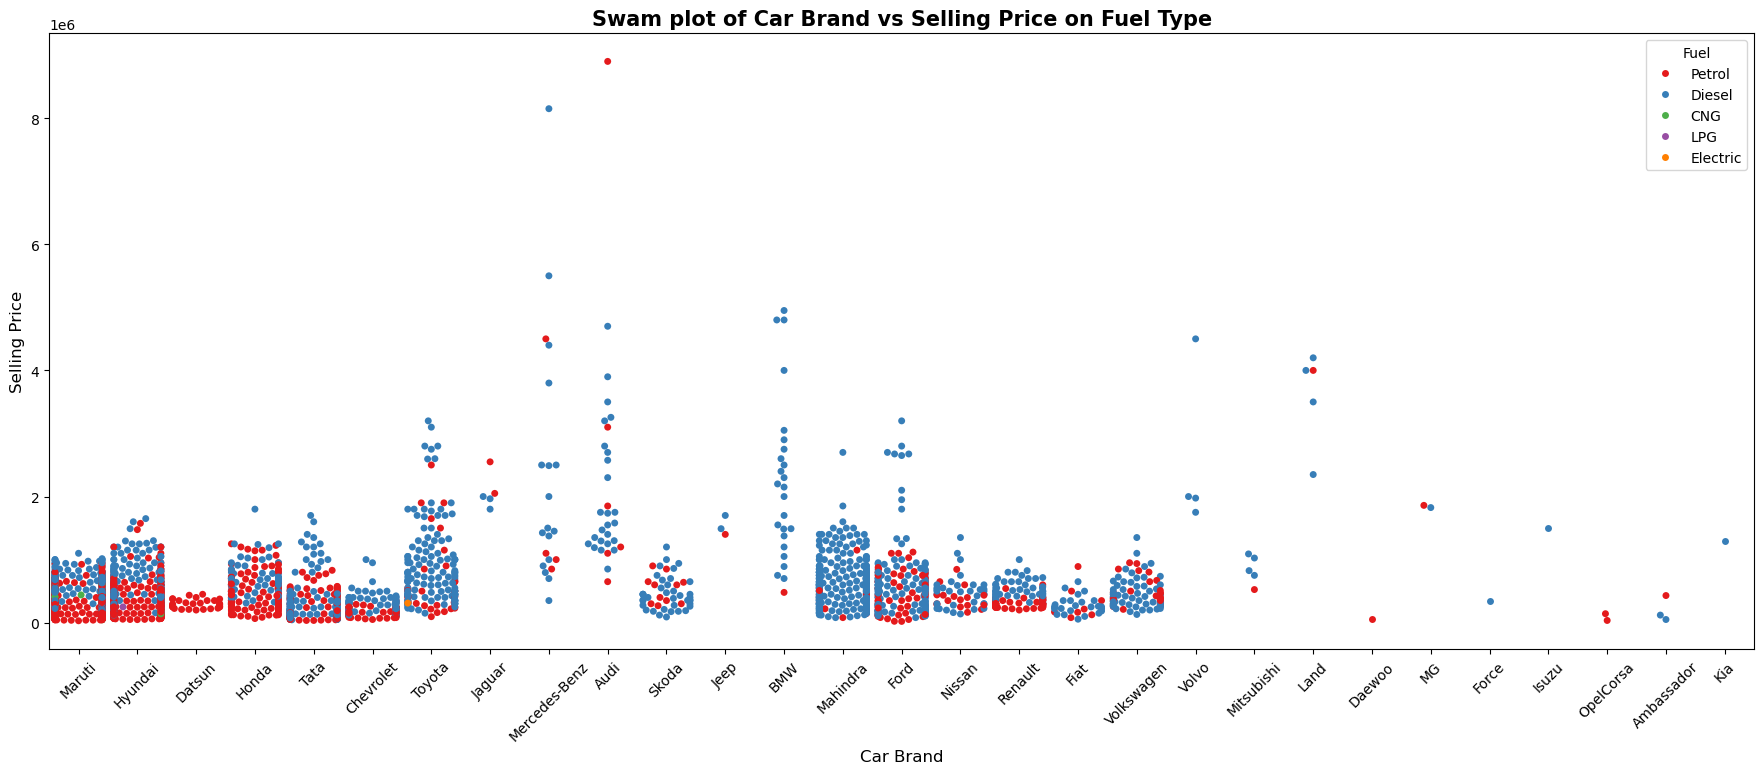

In [30]:
plt.figure(figsize=(22, 8))
sns.swarmplot(x='Car_Brand', y='Selling_Price', data=df, hue='Fuel', palette='Set1')
plt.title('Swam plot of Car Brand vs Selling Price on Fuel Type',weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Selling Price",fontsize=12)
plt.xlabel("Car Brand",fontsize=12)
plt.show()

This plot indicates the distribution of selling prices for second-hand cars based on fuel type. According to the dataset, petrol and diesel cars of any brand are the most preferred by customers. Brands like Maruti, Hyundai, Honda, and Mahindra are highly favored when purchasing pre-owned cars, while brands such as Daewoo, Force, Kia, MG, Isuzu, and OpelCorsa are the least popular in the pre-owned car market.

It appears that customers favored the petrol variants of brands like Datsun, Honda, and Maruti, while for brands such as Toyota, Mahindra, and Volkswagen, diesel variants were more popular. Additionally, luxury brands saw higher sales for diesel models compared to petrol ones.

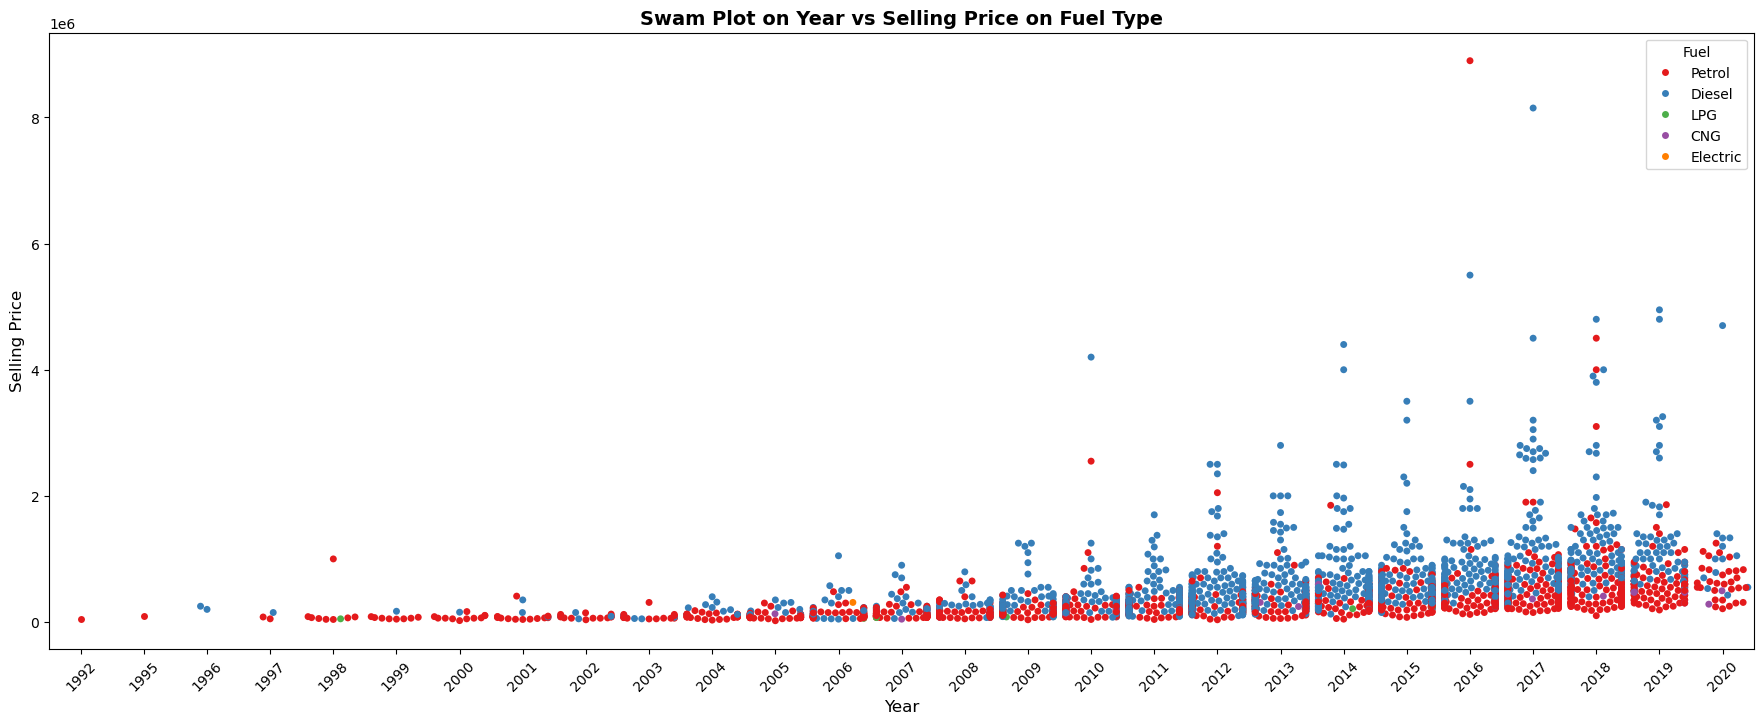

In [31]:
plt.figure(figsize=(22, 8))
sns.swarmplot(x='Year', y='Selling_Price', data=df, hue='Fuel', palette='Set1')
plt.title('Swam Plot on Year vs Selling Price on Fuel Type', weight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Selling Price",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.show()

This shows the growth of the pre-owned car market from 2004 to 2019, indicating a positive shift in the country's economic conditions. As the economy strengthened, more citizens were able to afford vehicles, leading to increased demand in the second-hand car market and reflecting a broader trend toward improved financial accessibility.

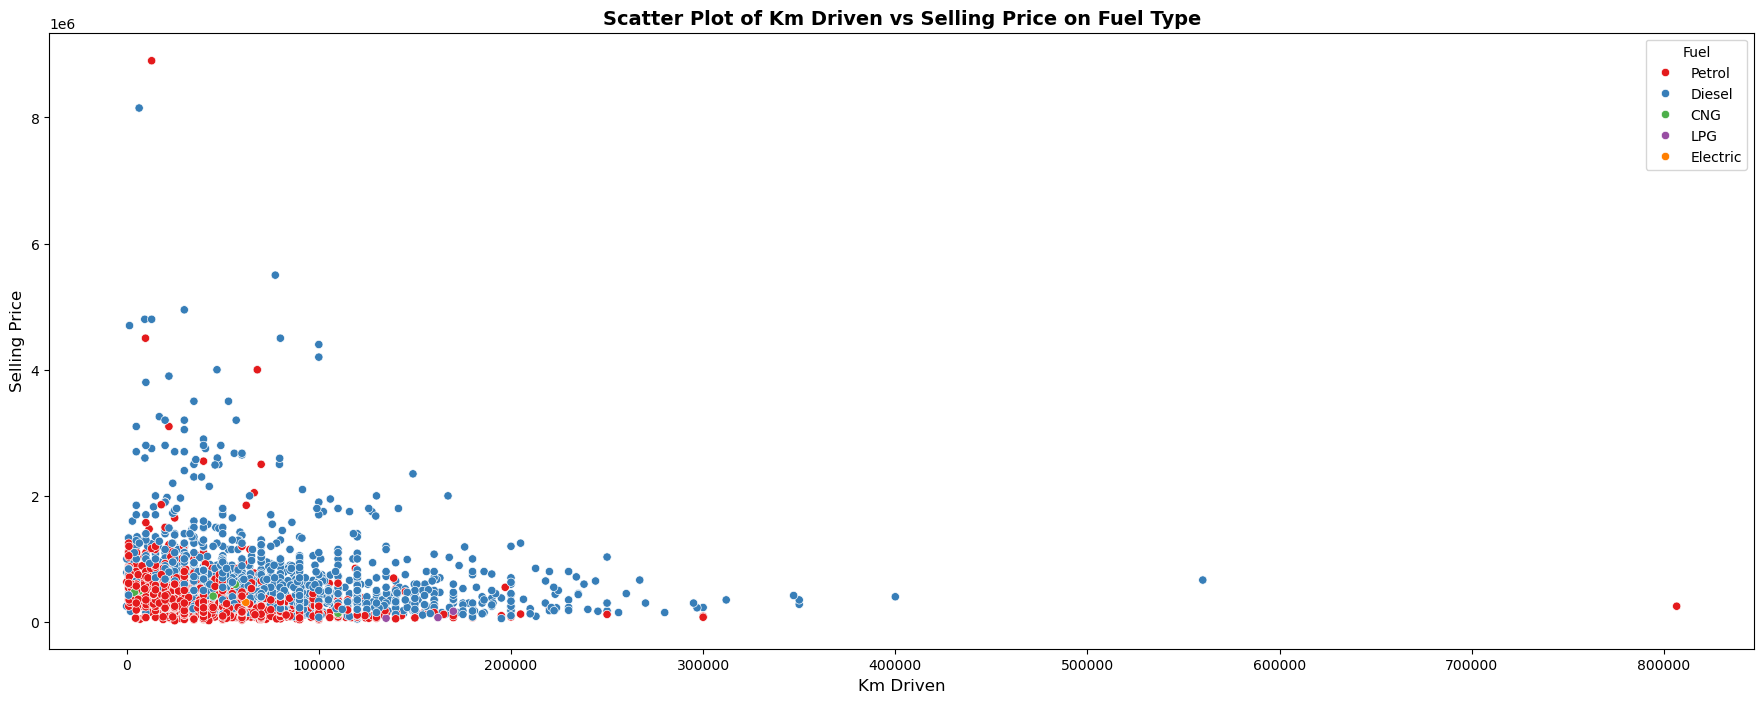

In [32]:
plt.figure(figsize=(22, 8))
sns.scatterplot(x='Km_Driven', y='Selling_Price', data=df, hue='Fuel', palette='Set1')
plt.title('Scatter Plot of Km Driven vs Selling Price on Fuel Type', weight='bold', fontsize=14)
plt.xlabel("Km Driven", fontsize=12)
plt.ylabel("Selling Price",fontsize=12)
plt.show()

It indicates that most petrol cars are used for shorter distances, whereas diesel cars are used for longer distances. This suggests that traveling with petrol-powered cars is more expensive compared to diesel cars, likely because diesel fuel was cheaper than petrol or may be due to other factor.

#### Correlation
<a id='corr'></a>

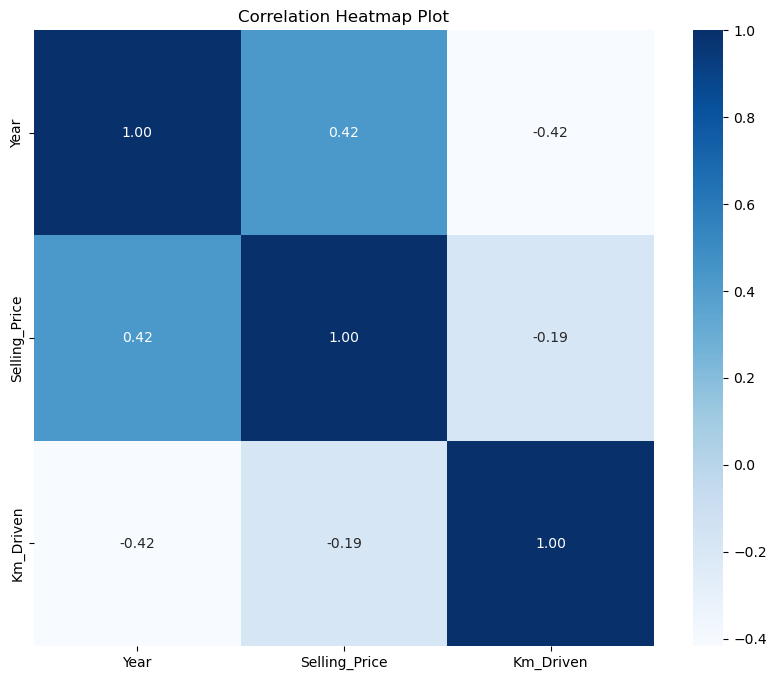

In [33]:
# Checking Correlation Between Numerical Columns
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Heatmap Plot")
plt.show()

<b>No correlation are found between the numerical columns

#### Outlier Detection
<a id='box'></a>

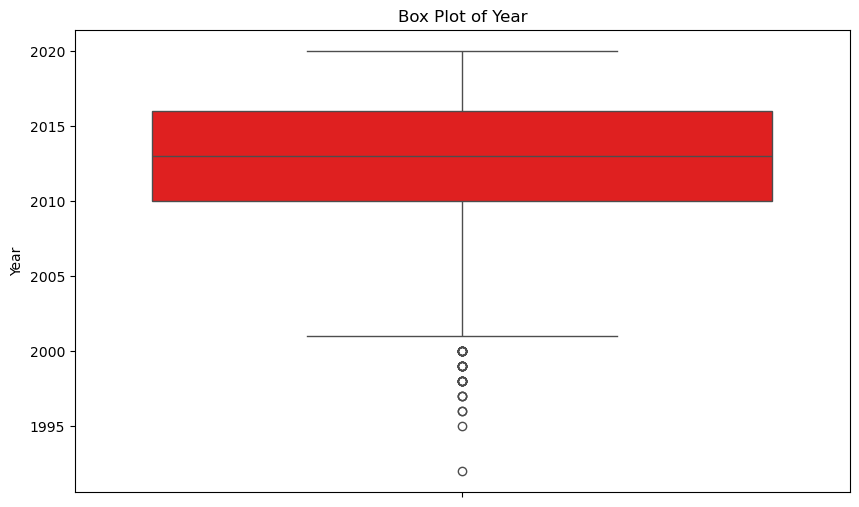

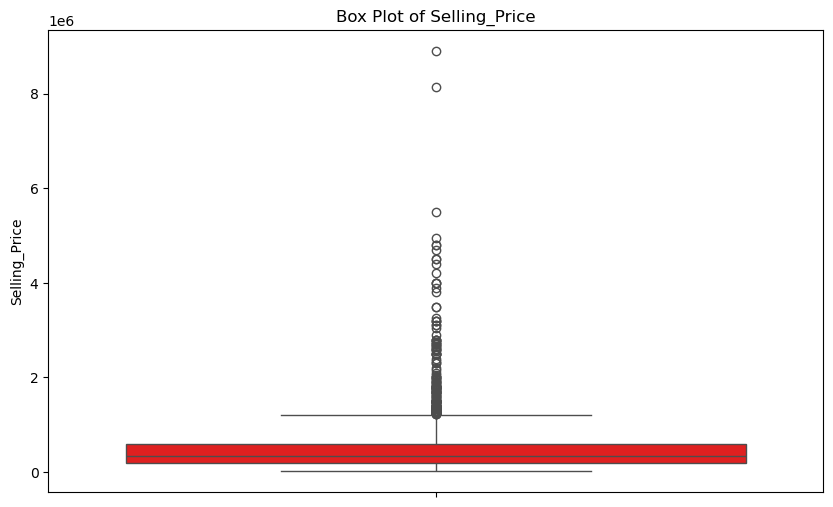

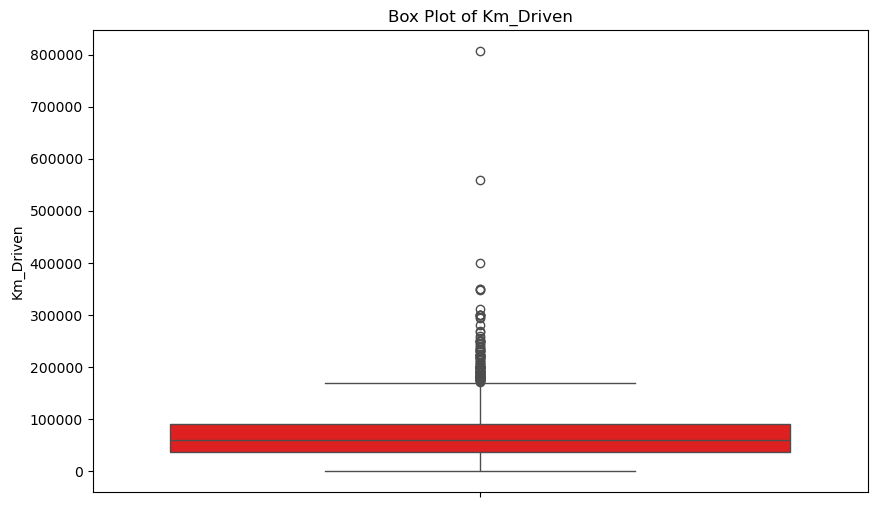

In [34]:
# Plotting Bar Plot On Numerical Columns
for i in numerical_col:
    plt.figure(figsize=(10, 6))  
    sns.boxplot(data=df, y=i,color ='red')  
    plt.title(f'Box Plot of {i}')  
    plt.show()

#### Performing on Outliers
<a id='out'></a>

In [35]:
# Analysing Outliers 
outliers = df.describe(percentiles=(0.01, 0.02, 0.03, 0.04, 0.05, 0.95, 0.96, 0.97, 0.98, 0.99)).T
outliers = outliers[['min', '1%', '2%', '3%', '4%', '5%', '50%', '95%', '96%', '97%', '98%', '99%', 'max']]
outliers

,min,1%,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,max
Year,1992.0,2000.00,2003.0,2004.0,2005.0,2005.0,2013.0,2019.0,2019.0,2019.0,2019.0,2020.0,2020.0
Selling_Price,20000.0,51786.64,60000.0,70000.0,75000.0,80000.0,350000.0,1200000.0,1300000.0,1497200.0,1800000.0,2675000.0,8900000.0
Km_Driven,1.0,1744.08,5000.0,6525.2,10000.0,10000.0,60000.0,149534.8,157960.0,170000.0,193440.0,223158.4,806599.0


In [36]:
# Removing Outliers from Dataframe
for i in df.columns:
    if df[i].dtype in ['float64', 'int64']:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[i] >= (Q1 - 1.5*IQR)) & (df[i] <= (Q3 + 1.5*IQR))]

df = df.reset_index(drop = True)
df

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
3245,Hyundai,i20,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3246,Hyundai,i20,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3247,Maruti,800,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3248,Hyundai,Creta,2016,865000,90000,Diesel,Individual,Manual,First Owner


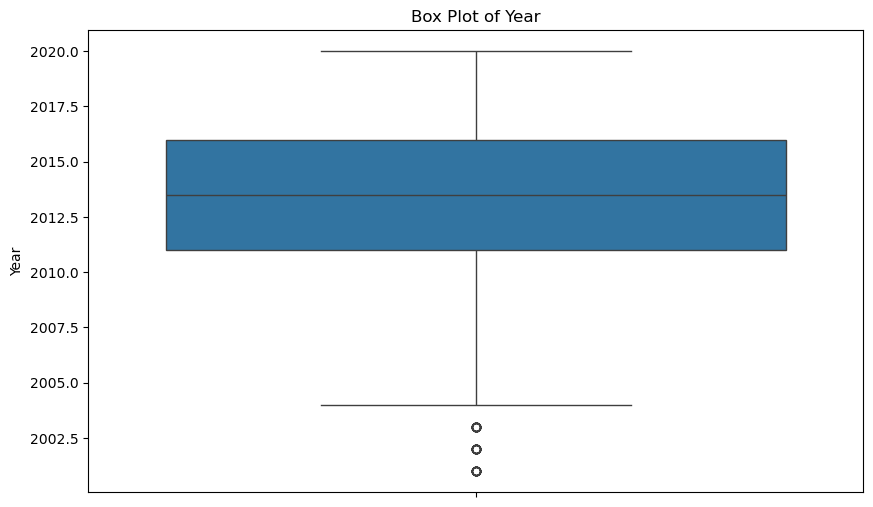

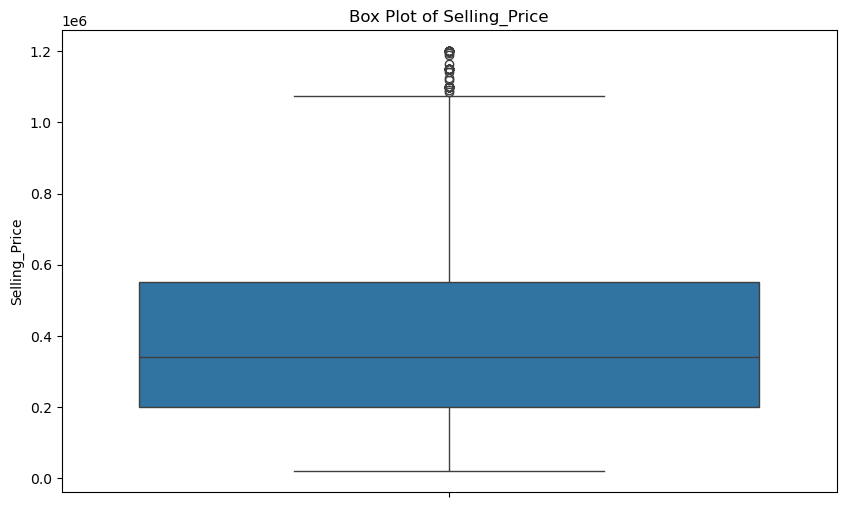

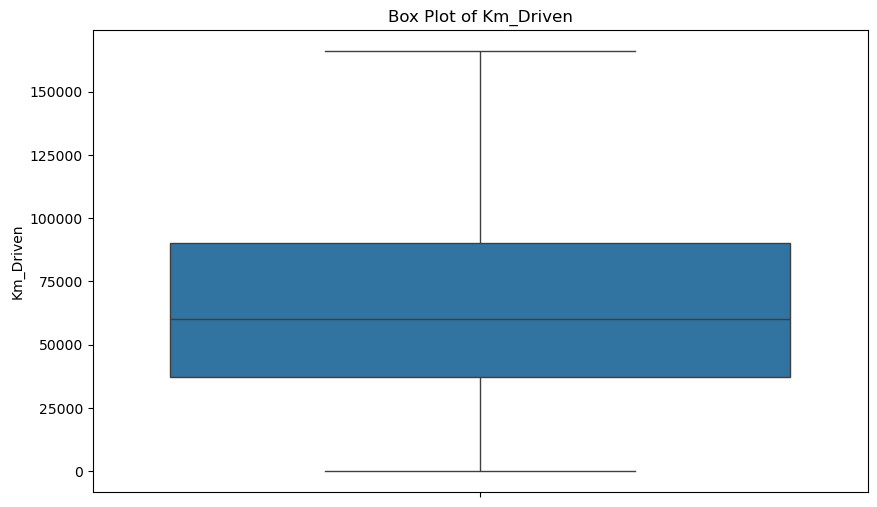

In [37]:
for i in numerical_col:
    plt.figure(figsize=(10, 6))  
    sns.boxplot(data=df, y=i)  
    plt.title(f'Box Plot of {i}')  
    plt.show()

## Saving the Processed Dataset
<a id='data'></a>

In [38]:
# Saving the Cleaned Dataset
df.to_csv('Car_Details_Cleaned_Dataset.csv', index=False )